In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

/Users/peterlawson/anaconda3/envs/Viz/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [43]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [52]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [45]:
INSTITUTION_ID = "ins_109508"

In [53]:
# YOUR CODE HERE
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment=PLAID_ENV
)

### 2. Generate a public token

In [97]:
# YOUR CODE HERE
create_token_res = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

### 3. Exchange the public token for an access token

In [98]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_token_res['public_token'])

access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [99]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'Pp4NA6D7KjfoRwmG4Nrgu9BWNNq18aU7PWjPj',
   'balances': {'available': 100, 'current': 110, 'limit': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'jVdr6Nn7GkuGWmn8EV3qfVMzwwB67eF1VL9Vl',
   'balances': {'available': 200, 'current': 210, 'limit': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'k5azoPWAnpS9aAo8BrbKClw7LL8DWBcWldalR',
   'balances': {'available': None, 'current': 1000, 'limit': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'official_name': 'Plaid Bronze Standard 0.2% Interest CD',
   'subtype': 'cd',
   'type': 'depository'},
  {'account_id': 'lV4BojnAbJu41mVe6z5vhVwBzzbgPXFZVdNVG',
   'balances': {'available': None, 'current': 410, 'limit': 2000},
   'mask': '

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [100]:
# YOUR CODE HERE
today = datetime.datetime.now().date()
start_date = str(today - datetime.timedelta(90))
end_date = str(today)
recent_transactions = client.Transactions.get(access_token, start_date=start_date, end_date=end_date)

### 2. Print the categories for each transaction

In [101]:
# YOUR CODE HERE
for transaction in recent_transactions['transactions']:
    print(transaction['category'])

['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop'

In [102]:
[[t['date'], t['name'], t['amount'], t['category'][0]] for t in recent_transactions['transactions']]

[['2020-04-10', 'INTRST PYMNT', -4.22, 'Transfer'],
 ['2020-03-31', 'United Airlines', 500, 'Travel'],
 ['2020-03-29', 'Uber', 6.33, 'Travel'],
 ['2020-03-26', 'Tectra Inc', 500, 'Food and Drink'],
 ['2020-03-25', 'AUTOMATIC PAYMENT - THANK', 2078.5, 'Payment'],
 ['2020-03-25', 'KFC', 500, 'Food and Drink'],
 ['2020-03-25', 'Madison Bicycle Shop', 500, 'Shops'],
 ['2020-03-16', 'CREDIT CARD 3333 PAYMENT *//', 25, 'Payment'],
 ['2020-03-16', 'Uber', 5.4, 'Travel'],
 ['2020-03-15', 'ACH Electronic CreditGUSTO PAY 123456', 5850, 'Transfer'],
 ['2020-03-15', 'CD DEPOSIT .INITIAL.', 1000, 'Transfer'],
 ['2020-03-14', 'Touchstone Climbing', 78.5, 'Recreation'],
 ['2020-03-14', 'United Airlines', -500, 'Travel'],
 ['2020-03-13', "McDonald's", 12, 'Food and Drink'],
 ['2020-03-13', 'Starbucks', 4.33, 'Food and Drink'],
 ['2020-03-12', 'SparkFun', 89.4, 'Food and Drink'],
 ['2020-03-11', 'INTRST PYMNT', -4.22, 'Transfer'],
 ['2020-03-01', 'United Airlines', 500, 'Travel'],
 ['2020-02-28', 'Uber

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [103]:
# YOUR CODE HERE
trans_df = pd.DataFrame([[t['date'], t['name'], t['amount'], t['category'][0]] for t in recent_transactions['transactions']], columns=['date', 'name', 'amount', 'category'])
trans_df.head()

,date,name,amount,category
0,2020-04-10,INTRST PYMNT,-4.22,Transfer
1,2020-03-31,United Airlines,500.00,Travel
2,2020-03-29,Uber,6.33,Travel
3,2020-03-26,Tectra Inc,500.00,Food and Drink
4,2020-03-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [104]:
# YOUR CODE HERE
trans_df = trans_df.set_index(pd.DatetimeIndex(trans_df.date))
trans_df = trans_df.drop(columns=['date'])
trans_df.head()

,name,amount,category
date,,,
2020-04-10,INTRST PYMNT,-4.22,Transfer
2020-03-31,United Airlines,500.00,Travel
2020-03-29,Uber,6.33,Travel
2020-03-26,Tectra Inc,500.00,Food and Drink
2020-03-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [125]:
# YOUR CODE HERE
income_data = client.Income.get(access_token)

In [119]:
# Determine the previous year's gross income and print the results
prev_year_gross_income = income_data['income']['last_year_income_before_tax']
print(prev_year_gross_income)

7285


In [123]:
# Determine the current monthly income and print the results
current_monthly_income = income_data['income']['income_streams'][0]['monthly_income']
print(current_monthly_income)

500

In [126]:
# Determine the projected yearly income and print the results
projected_yearly_income = income_data['income']['projected_yearly_income']
print(projected_yearly_income)

6085


# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [164]:
# YOUR CODE HERE

# Calculate the total spending per category and print the results
spending_by_category = trans_df.groupby('category').sum()
spending_by_category

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20533.12
Travel,35.19


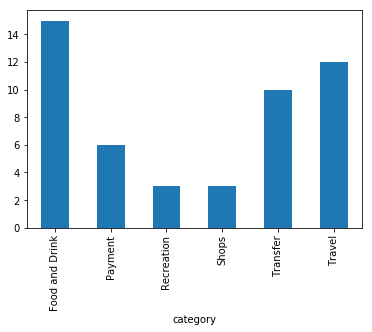

In [184]:
# Generate a bar chart with the number of transactions for each category 
num_trans_per_category = trans_df.groupby('category').count()
num_trans_per_category['name'].plot(kind='bar')

### Calculate the expenses per month

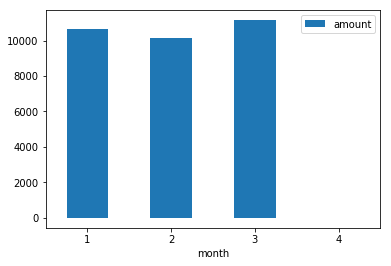

In [213]:
# YOUR CODE HERE
expenses_by_month = trans_df.groupby(trans_df.index.month).sum()
expenses_by_month.index.rename('month', inplace=True)
expenses_by_month.plot(kind='bar', rot=0)